<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Image_Generator_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-04-07 13:16:43--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.207, 172.253.63.207, 142.250.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   127MB/s    in 1.1s    

2024-04-07 13:16:44 (127 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import zipfile

#Upzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [6]:
import os

#Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

#Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [7]:
# Now see what the filenames look like in the horses and humans training directories:

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse39-2.png', 'horse48-5.png', 'horse13-6.png', 'horse17-9.png', 'horse09-9.png', 'horse12-0.png', 'horse22-4.png', 'horse21-5.png', 'horse24-2.png', 'horse44-5.png']
['human04-28.png', 'human13-00.png', 'human03-25.png', 'human06-14.png', 'human07-16.png', 'human09-29.png', 'human12-01.png', 'human13-30.png', 'human13-02.png', 'human13-14.png']


In [8]:
print('Total training horse images: ', len(os.listdir(train_horse_dir)))
print('Total training human images: ', len(os.listdir(train_human_dir)))

Total training horse images:  500
Total training human images:  527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

# Parameters for our graph; we will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 4

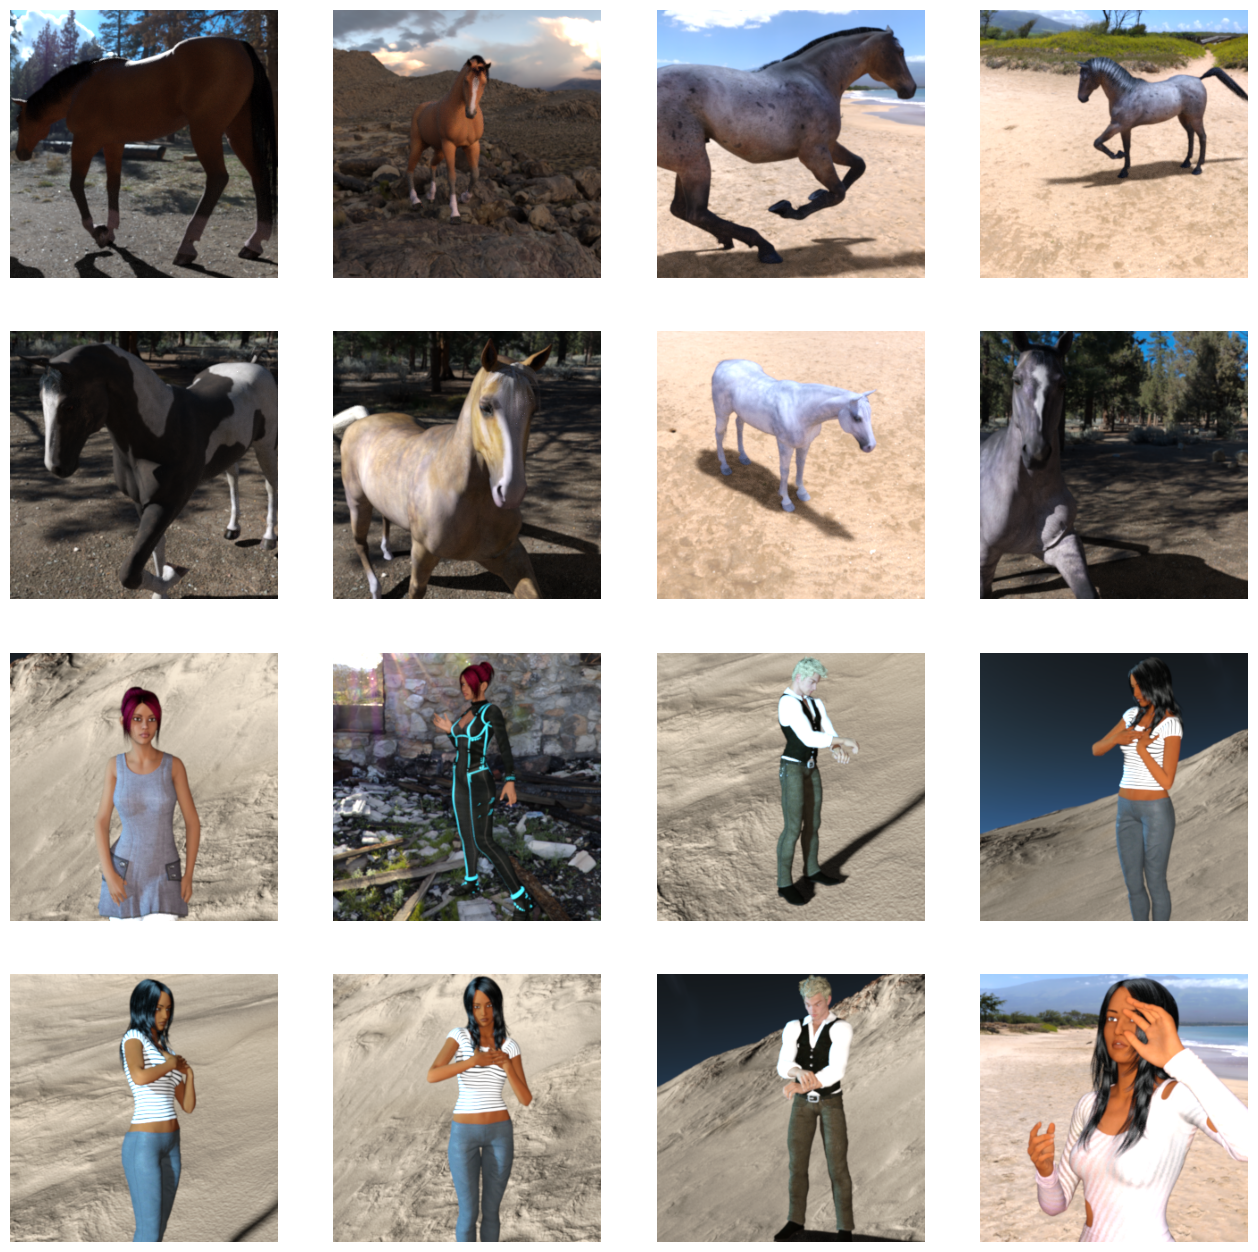

In [10]:
# Set up matplotlib fig and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4,nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir,fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname)
                 for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
import tensorflow as tf

In [15]:
model = tf.keras.models.Sequential([
    # First Convolutional layer
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolutional layer
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third Convolutional layer
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth Convolutional layer
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth Convolutional layer
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 35, 35, 64)        0

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size = (300,300),
    batch_size = 128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    #Showing the training progress for each epoch, if verbose = 1
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 79s 11s/step - loss: 0.2334 - accuracy: 0.9010
Epoch 2/15
8/8 [==============================] - 79s 9s/step - loss: 0.1692 - accuracy: 0.9455
Epoch 3/15
8/8 [==============================] - 78s 9s/step - loss: 0.3618 - accuracy: 0.8576
Epoch 4/15
8/8 [==============================] - 79s 9s/step - loss: 0.1165 - accuracy: 0.9533
Epoch 5/15
8/8 [==============================] - 78s 9s/step - loss: 0.4412 - accuracy: 0.8309
Epoch 6/15
8/8 [==============================] - 78s 11s/step - loss: 0.2842 - accuracy: 0.9043
Epoch 7/15
8/8 [==============================] - 78s 11s/step - loss: 0.1354 - accuracy: 0.9499
Epoch 8/15
8/8 [==============================] - 78s 9s/step - loss: 0.0504 - accuracy: 0.9822
Epoch 9/15
8/8 [==============================] - 79s 9s/step - loss: 0.3394 - accuracy: 0.8665
Epoch 10/15
8/8 [==============================] - 78s 11s/step - loss: 0.0943 - accuracy: 0.9611
Epoch 11/15
8/8 [==================

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img,img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path,target_size = (300,300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x,axis = 0)

  images = np.vstack([x])
  classes = model.predict(images,batch_size = 10)
  print(classes[0])

  if classes[0] > 0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')